# Getting into Business: Real Estate Investment Exploration
### Goal: Basic exloration (EDA) of Washington home price data set from 2014
### Extra: Predict Home Prices from other factors like square footage, location, etc.

# _____________________________________________________________
# Appendix:

1.) Importing Data & Python Libraries

2.) Viewing Data Set / Data Frame

3.) Part I- Understanding the Data: When, Where, How, Attributes, Data Types

4.) Part II- Data Summary & Initial Insights: EDA including- Summary Stats, Empty Values, Outliers, Visualizations

5.) Part III- Expanded Knowledge, additional data sets?

5.5.) **Regression Models: Predicting Home Prices)

6.) Part IV- Communicate Findings, Conclusions & Determinations




#Importing Data & Python Libraries:
##Description:
###1.) Import Data Analysis Python Libraries:
####-pandas
####-numpy
####-matplot lib
###1.) Import housing data csv file using google drive
###2.) Read CSV file using Pandas
###3.) Check for errors

In [ ]:

###Importing Data:
import pandas as pd
import numpy as np
import matplotlib as plt

from google.colab import drive
drive.mount('/content/drive')


#Establish File Path
file_path = '/content/drive/My Drive/Data_Analytics/Housing_Data.csv'

try:
    #Attempt to read the CSV file using pandas
    df = pd.read_csv(file_path, encoding='latin-1')

    #Print the first few rows of the DataFrame to verify import
    print(df.head())
    print(df.tail())

    print() #spacing

    #Print basic DataFrame info (column names, data types)
    print(df.info())

#handle Errors
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except pd.errors.ParserError:
    print(f"Error: Could not parse the CSV file. Check the file format and delimiters.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-09 00:00:00   376000.0       3.0       2.00         1340      1384   
1  2014-05-09 00:00:00   800000.0       4.0       3.25         3540    159430   
2  2014-05-09 00:00:00  2238888.0       5.0       6.50         7270    130017   
3  2014-05-09 00:00:00   324000.0       3.0       2.25          998       904   
4  2014-05-10 00:00:00   549900.0       5.0       2.75         3060      7015   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     3.0           0     0          3        1340              0      2008   
1     2.0           0     0          3        3540              0      2007   
2     2.0           0     0          3        6420            850      2010   
3     2.0           0     0          3         798            200   

#Viewing Data Set
##Description:
### Print an array, formatted table, and abreviated display of the Data Set for reference purposes

In [ ]:
# @title Array Format

#Print Array of Data Set
np.set_printoptions(threshold=np.inf, precision=20, suppress=True)
df = pd.read_csv(file_path)
data_array = df.to_numpy()
print(", ".join(df.columns))
print(data_array)


Streaming output truncated to the last 5000 lines.
  0 '16518-16526 147th Ave SE' 'Renton' 'WA 98058' 'USA']
 ['2014-06-09 00:00:00' 539950.0 3.0 2.25 2190 7149 1.0 0 1 4 1240 950
  1963 0 '3600-3698 Wells Ave N' 'Renton' 'WA 98056' 'USA']
 ['2014-06-09 00:00:00' 552000.0 2.0 2.5 1380 951 3.0 0 0 3 1380 0 2006 0
  '5010 Greenwood Ave N' 'Seattle' 'WA 98103' 'USA']
 ['2014-06-09 00:00:00' 250000.0 5.0 1.5 2520 5753 1.5 0 0 4 1510 1010
  1928 0 '2134 Montgomery Ave' 'Enumclaw' 'WA 98022' 'USA']
 ['2014-06-09 00:00:00' 502000.0 3.0 1.75 1300 8800 1.0 0 0 4 1300 0 1963
  0 '16805 NE 12th St' 'Bellevue' 'WA 98008' 'USA']
 ['2014-06-09 00:00:00' 480000.0 4.0 1.75 2220 6500 2.0 0 3 4 2220 0 1964
  0 '16905 33rd Ave SW' 'Burien' 'WA 98166' 'USA']
 ['2014-06-09 00:00:00' 378500.0 2.0 1.0 730 7528 1.0 0 0 3 730 0 1946 0
  '2048 NE 97th St' 'Seattle' 'WA 98115' 'USA']
 ['2014-06-09 00:00:00' 1350000.0 4.0 3.25 3300 15907 2.0 0 0 5 3300 0
  1985 0 '9213 SE 68th St' 'Mercer Island' 'WA 98040' 'USA'

In [ ]:
# @title Abreviated Display
df_display = pd.DataFrame(data_array, columns=df.columns)
print(df_display)

                     date          price bedrooms bathrooms sqft_living  \
0     2014-05-09 00:00:00       376000.0      3.0       2.0        1340   
1     2014-05-09 00:00:00       800000.0      4.0      3.25        3540   
2     2014-05-09 00:00:00      2238888.0      5.0       6.5        7270   
3     2014-05-09 00:00:00       324000.0      3.0      2.25         998   
4     2014-05-10 00:00:00       549900.0      5.0      2.75        3060   
...                   ...            ...      ...       ...         ...   
4135  2014-07-09 00:00:00  308166.666667      3.0      1.75        1510   
4136  2014-07-09 00:00:00  534333.333333      3.0       2.5        1460   
4137  2014-07-09 00:00:00  416904.166667      3.0       2.5        3010   
4138  2014-07-10 00:00:00       203400.0      4.0       2.0        2090   
4139  2014-07-10 00:00:00       220600.0      3.0       2.5        1490   

     sqft_lot floors waterfront view condition sqft_above sqft_basement  \
0        1384    3.0    

In [ ]:
# @title Formatted Table
from tabulate import tabulate
table = tabulate(data_array, headers=df.columns, tablefmt="fancy_grid")
print(table)

╒═════════════════════╤══════════════════╤════════════╤═════════════╤═══════════════╤════════════╤══════════╤══════════════╤════════╤═════════════╤══════════════╤═════════════════╤════════════╤════════════════╤════════════════════════════════════════════════╤════════════════════╤════════════╤═══════════╕
│ date                │            price │   bedrooms │   bathrooms │   sqft_living │   sqft_lot │   floors │   waterfront │   view │   condition │   sqft_above │   sqft_basement │   yr_built │   yr_renovated │ street                                         │ city               │ statezip   │ country   │
╞═════════════════════╪══════════════════╪════════════╪═════════════╪═══════════════╪════════════╪══════════╪══════════════╪════════╪═════════════╪══════════════╪═════════════════╪════════════╪════════════════╪════════════════════════════════════════════════╪════════════════════╪════════════╪═══════════╡
│ 2014-05-09 00:00:00 │ 376000           │          3 │        2    │          134

# Part I- Understanding the Data: When, Where, How, Attributes, Data Types
##Description:
###-Details on When, where, and how the data set was acquired
###-What are the attributes in the data set and their data types


In [ ]:

# @title When was the Data Acquired:
print(df['date'].min())

print(df['date'].max())

# @markdown Conlusions:
# @markdown
# @markdown -The Data appears to have been collected in 2014
# @markdown
# @markdown -The time range of the data collected is between May 2nd and July 10th (2014)


2014-05-02 00:00:00
2014-07-10 00:00:00


In [ ]:

# @title Where was the data acquired, geographics?
print(df['country'].unique())
print(df['statezip'].unique())
print(df['city'].unique())

# @markdown -The data was collected from various cities in Washington State, USA


['USA']
['WA 98103' 'WA 98014' 'WA 98029' 'WA 98117' 'WA 98146' 'WA 98038'
 'WA 98031' 'WA 98136' 'WA 98122' 'WA 98053' 'WA 98105' 'WA 98004'
 'WA 98112' 'WA 98155' 'WA 98126' 'WA 98040' 'WA 98092' 'WA 98005'
 'WA 98019' 'WA 98118' 'WA 98006' 'WA 98178' 'WA 98106' 'WA 98116'
 'WA 98058' 'WA 98074' 'WA 98077' 'WA 98033' 'WA 98115' 'WA 98052'
 'WA 98168' 'WA 98107' 'WA 98042' 'WA 98027' 'WA 98125' 'WA 98072'
 'WA 98166' 'WA 98003' 'WA 98109' 'WA 98177' 'WA 98034' 'WA 98070'
 'WA 98199' 'WA 98028' 'WA 98023' 'WA 98133' 'WA 98056' 'WA 98030'
 'WA 98008' 'WA 98108' 'WA 98102' 'WA 98001' 'WA 98075' 'WA 98188'
 'WA 98007' 'WA 98065' 'WA 98059' 'WA 98198' 'WA 98002' 'WA 98144'
 'WA 98024' 'WA 98051' 'WA 98055' 'WA 98045' 'WA 98039' 'WA 98119'
 'WA 98032' 'WA 98011' 'WA 98022' 'WA 98148' 'WA 98068' 'WA 98047'
 'WA 98057' 'WA 98010' 'WA 98050' 'WA 98354' 'WA 98288']
['Seattle' 'Carnation' 'Issaquah' 'Maple Valley' 'Kent' 'Redmond'
 'Clyde Hill' 'Shoreline' 'Mercer Island' 'Auburn' 'Bellevue' 'Du

##How was the data collected, methods?

-No source is listed for the data set which reduces credibility.

-However, the attributes collected are and would all have been publically available from various records or websites.

##What are the attributes of the Data Set; Description & Data Type:

1.) Date (Categorical, Ordinal): The date the property transaction was recorded (yyyy-mm-dd format)

2.) Price (Numerical, Ratio): The sale price of the property in USD. This is the dependent or target variable we may aim to predict with the other attributes or characteristics.

3.) Bedrooms (Numerical, Ratio): The number of bedrooms in the property.

4.) Bathrooms (Numerical, Ratio): The number of bathrooms in the property.

4.) Sqft Living (Numerical Ratio): The size of the living area in square feet.

5.) Sqft Lot (Numerical Ratio): The size of the properties lot (total allocated area) in square feet.

6.) Floors (Numerical, Ratio): The number of floors in the property.

7.) Waterfront (Categorical, Binary): A binary indicator, 1 = waterfront view, 0 = no waterfront.

8.) View (Categorical, Ordinal): An index from 0 to 4 indicating the quality of the property’s view. This value is arbitrary and may have less reliability or consistency than other attributes.

9.) Condition (Categorical, Ordinal): An index from 1 to 5 rating the condition of the property. This value is arbitrary and may have less reliability or consistency than other attributes.

11.) Sqft Above (Numerical, Ratio): The square footage of the property above the basement. This can help isolate the value contribution of above-ground space.

12.) Sqft Basement (Numerical, Ratio): The square footage of the basement (if no basement, value will present as 0).

13.) Yr Built (Numerical, Interval): The year the property was originally built.

14.) Yr Renovated (Numerical, Interval): The year the property was last renovated or significantly modified.

15.) Street (Categorical, Nominal): The street address of the property.

16.) City (Categorical, Nominal): The city where the property is located.

17.) Statezip (Categorical, Nominal): The state and zip code of the property.

18.) Country (Categorical, Nominal): The country where the property is located.

Note: The attributes are composed of various data types of which 8 are categorical and 10 are numerical:

-4 categorical nominal

-3 categorical ordinal

-1 categorical Binary

-2 numerical interval

-8 numerical ratio

#Part II- Data Summary & Initial Insights: EDA including- Summary Stats, Empty Values, Outliers, Visualizations
##Description:
###-Summary of basic statistics, handling missing values & outliers, Visualizations and descriptions


In [ ]:
# @title Basic Information and & Statistics of Data Set

# @markdown ##Description:

# @markdown ###Show basic information of data set including:

# @markdown -data type

# @markdown -column name

# @markdown -memory usage


# @markdown ### Show Basic Statistics of features including:

# @markdown -means

# @markdown -median

# @markdown -mode

# @markdown -min

# @markdown -max

# @markdown -Variance

# @markdown -Standard Deviation

# @markdown -Range



#Basic Data Frame info
print("Basic Information of Data Set:\n")
print(f"{df.info()}\n")#information of each variable

# Summary Statistics
print("Summary Statistics of Data Set:\n")
mean = df.mean(numeric_only=True)
print("Means:\n")
print(mean)
print()

median = df.median(numeric_only=True)
print("Medians:\n")
print(median)
print()

mode = df.mode(numeric_only=True)
print("Mode:\n")
print(mode)
print()

min = df.min(numeric_only=True)
print("Min:\n")
print(min)
print()

max = df.max(numeric_only=True)
print("Max:\n")
print(max)
print()

var = df.var(numeric_only=True)
print("Variance: \n")
print(var)
print()


SD = df.std(numeric_only=True)
print("Standard Deviation: \n")
print(SD)
print()

range = df.max(numeric_only=True) - df.min(numeric_only=True)
print("Range: \n")
print(range)


Basic Information of Data Set:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 

##Handling Missing or Empty Values:
###Description:

*   Find any missing or zero values in features that could not have a meaningful zero value (ex. waterfront could have a zero value indicating the property does not have a waterfront location/view)


*   Replace or remove missing entries where necessary (Clean data set)



In [ ]:
# @title Missing or Empty Values

for column in df.columns:
    #Features that must exist/could not have meaningful zero value
    if pd.api.types.is_numeric_dtype(df[column]) and column not in ['waterfront', 'view', 'sqft_basement', 'yr_renovated','sqft_loft']:
        # Count values equal to 0 using a boolean mask and sum
        missing_values = (df[column] == 0).sum()
        missing_rows = df[df[column] == 0]  # Rows where the value is 0
        print(f"Missing values in column '{column}': {missing_values}")
        print(f"Rows with 0 values in '{column}':")
        print(missing_rows)

    #Features that could have meaningful zero value
    elif column in ['waterfront', 'view', 'sqft_basement', 'yr_renovated','loft']:
        missing_values = df[column].isnull().sum()
        missing_rows = df[df[column].isnull()]  # Rows where the value is NaN
        print(f"Missing values in column '{column}': {missing_values}")
        print(f"Rows with missing values in '{column}':")
        print(missing_rows)

    else:
        for column in df.columns:
         if df[column].isnull().any():
            missing_values = df[column].isnull().sum()
            missing_rows = df[df[column].isnull()]
            print(f"Missing values in column '{column}': {missing_values}")
            print(f"Rows with missing values in '{column}':")
            print(missing_rows)


Missing values in column 'price': 49
Rows with 0 values in 'price':
                     date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
3894  2014-05-05 00:00:00    0.0       3.0       1.75         1490     10125   
3896  2014-05-05 00:00:00    0.0       4.0       2.75         2600      5390   
3897  2014-05-05 00:00:00    0.0       6.0       2.75         3200      9200   
3898  2014-05-06 00:00:00    0.0       5.0       3.50         3480     36615   
3901  2014-05-07 00:00:00    0.0       5.0       1.50         1500      7112   
3902  2014-05-07 00:00:00    0.0       4.0       4.00         3680     18804   
3914  2014-05-09 00:00:00    0.0       2.0       2.50         2200    188200   
3916  2014-05-09 00:00:00    0.0       4.0       2.25         2170     10500   
3922  2014-05-12 00:00:00    0.0       5.0       4.50         4630      6324   
3923  2014-05-13 00:00:00    0.0       5.0       4.00         4430      9000   
3925  2014-05-13 00:00:00    0.0       4.0       4.5

##Notes on missing values

-There are 49 zero/missing values in the price column

-These are likely unlisted homes, confidential or private sales with undisclosed values, or incomplete listings

-There are an additional two values missing in the bedrooms and bathrooms column (each), under rows #1905 and #2407

-These are likely missing values due to human error or incomplete entry as both homes have square footage data and would logically have these features

##Potential handling Strategies

-The data set is relatively large (4,000+ homes) and the missing values seem uncorrelated in feature groupings (ie. different locations, dates, and not all high square footage etc.)

-So simply removing the rows with missing prices or the two with missing bedroom/bathroom values should have little affect on the data set

-Alternatively these data points could be replaced with median prices, or median number of rooms.

-Relatively accurate estimates could also likely be made for the missing data based on the most influential factors like location, size, etc.

-However this is largely the purpose of the final analysis and pre-emptive estimations or predictions could skew or alter final results and conclusions

In [ ]:
# @title Clean Data: Remove Missing Values
# @markdown ##Description:

# @markdown 1.) Remove rows where the 'price' column has a value of 0

# @markdown 2.) Remove rows where the 'bedrooms' or 'bathrooms' columns have missing values (NaN)
df_cleaned = df[(df['price'] != 0) & (df['bedrooms'].notnull()) & (df['bathrooms'].notnull())]

# @markdown 3.) Reset the index of the cleaned DataFrame
df_cleaned.reset_index(drop=True, inplace=True)

# @markdown 4.) Rename cleaned data frame (df_cleaned)
# Print the cleaned DataFrame
print("Cleaned DataFrame:")
print(df_cleaned)



Cleaned DataFrame:
                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-09 00:00:00  3.760000e+05       3.0       2.00         1340   
1     2014-05-09 00:00:00  8.000000e+05       4.0       3.25         3540   
2     2014-05-09 00:00:00  2.238888e+06       5.0       6.50         7270   
3     2014-05-09 00:00:00  3.240000e+05       3.0       2.25          998   
4     2014-05-10 00:00:00  5.499000e+05       5.0       2.75         3060   
...                   ...           ...       ...        ...          ...   
4086  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4087  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4088  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4089  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4090  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqf

In [ ]:
# @title Detecting Outliers
# @markdown ##Description:

# @markdown 1.) Detect numerical outliers greater than 3 Standard Deviations from the mean

# @markdown 2.) Identify which rows and columns contain meaningful and adressable outliers
import pandas as pd
import numpy as np

#Detect outliers (>3 standard deviations):
threshold = 3

# Loop through each column in the DataFrame
for column in df_cleaned.columns:
    if pd.api.types.is_numeric_dtype(df[column]):  # Check if column is numeric
        # Calculate Z-scores for the column
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

        # Identify outliers based on Z-score threshold
        outliers = df[z_scores > threshold]

        # If there are outliers, print the summary
        if not outliers.empty:
            print(f"Outliers in column '{column}':")
            print(f"Total number of outliers: {len(outliers)}")
            print(outliers.head())  # Print the first few outliers for better readability
            print("-" * 50)
        if outliers.empty:
            print(f"No outliers found in column '{column}'.")
df.isnull().sum()


Outliers in column 'price':
Total number of outliers: 26
                     date      price  bedrooms  bathrooms  sqft_living  \
121   2014-05-13 00:00:00  2555000.0       4.0       2.50         5300   
672   2014-05-21 00:00:00  2700000.0       5.0       4.75         5305   
1083  2014-05-29 00:00:00  2453500.0       4.0       3.50         4730   
1107  2014-05-29 00:00:00  3100000.0       6.0       4.25         6980   
1111  2014-05-29 00:00:00  2750000.0       4.0       3.25         4430   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
121      26211     2.0           1     2          2        4570   
672       8401     2.0           0     2          3        3745   
1083     13586     1.5           0     0          5        4270   
1107     15682     3.0           0     4          4        5330   
1111     21000     2.0           0     0          3        4430   

      sqft_basement  yr_built  yr_renovated               street  \
121             730      19

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


##Notes on Outliers:

###Expected "Outliers" and Reasoning
-Outliers are expected for many of these features as a sample of homes across Washington State will likely have large variances in features, quality, price etc. due to the nature of socio-economic classes, regional wealth, geographic areas (urban vs. rural), home construction, and supply and demand fluctuations

-For example a massive waterfront property in a "desireable" area will likely have much higher square footage, view rating, room counts, and price than the mean of the data set

###Extreme Outliers & Limiting Price Range
-However, there are some extreme outliers (massive and unrealistic deviations from expected values) that may be due to human error

-for example the Home in row 3890 is priced at $~26.6M with high but not massive square footage and only 3 bedrooms and 2 bathrooms

-This could possibly be a penthouse or other special housing, the data set does not specify the type of housing or other potentially relevant factors

-In order to smooth the data set and reduce chances of large outliers influencing analysis or conlusions I will remove any outliers in price greater than 3 SD from the mean. This will reduce the scope of the dataset and any insights to homes within the cutoff of up to a price of ~$2.3M

-I will perform ex-post scenario analysis on the regression models to see if this outlier removal influences the fitting/performance of the models

-See below for outlier removal process





In [ ]:
# @title Remove Price Outliers for Prediction and Visualization purposes
# @markdown ##Description:

# @markdown Purpose: Remove rows/entries with price outliers

# @markdown 1.) Calculate the mean and standard deviation of the 'price' column

#
price_mean = df_cleaned['price'].mean()
price_std = df_cleaned['price'].std()

# @markdown 2.) Define the threshold for outlier detection (3 standard deviations)
threshold = 3

# @markdown 3.) Identify outliers based on the threshold
outliers = df_cleaned[(df_cleaned['price'] < price_mean - threshold * price_std) | (df_cleaned['price'] > price_mean + threshold * price_std)]

# @markdown 4.) Remove outliers from the DataFrame
df_cleaned_no_outliers = df_cleaned[~df_cleaned.index.isin(outliers.index)]

# @markdown 5.) Reset the index of the cleaned DataFrame
df_cleaned_no_outliers.reset_index(drop=True, inplace=True)

# @markdown 6.) Rename the DataFrame to "df_cleaned_no_outliers"
# Print the DataFrame without outliers
print("DataFrame without outliers:")
print(df_cleaned_no_outliers)

print(f"Highest Home price after removal of outliers: ${df_cleaned_no_outliers['price'].max()}")

DataFrame without outliers:
                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-09 00:00:00  3.760000e+05       3.0       2.00         1340   
1     2014-05-09 00:00:00  8.000000e+05       4.0       3.25         3540   
2     2014-05-09 00:00:00  2.238888e+06       5.0       6.50         7270   
3     2014-05-09 00:00:00  3.240000e+05       3.0       2.25          998   
4     2014-05-10 00:00:00  5.499000e+05       5.0       2.75         3060   
...                   ...           ...       ...        ...          ...   
4060  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4061  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4062  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4063  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4064  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condi

In [ ]:
# @title Logic Check for Remaining Outliers
# @markdown ##Description:

# @markdown -Check lowest and highest ten prices to check for any unreasonable data points

# @markdown ##Results:
# @markdown -Lowest remaining price is 7,800 while next lowest is 80,000.

# @markdown -The home is small but this still seems unreasonable and was likely human error or sold under special circumstances (severe damage and repairs needed, distressed sale/foreclosure, auction/inheritance situation etc.)

# @markdown -I will remove this data point to maintain consistency and avoid including an illogical outlier
print(df_cleaned_no_outliers.nsmallest(10, 'price'))
print(df_cleaned_no_outliers.nlargest(10, 'price'))

df_cleaned_no_outliers = df_cleaned_no_outliers[df_cleaned_no_outliers['price'] != 7800]


                     date     price  bedrooms  bathrooms  sqft_living  \
3866  2014-05-06 00:00:00    7800.0       2.0       1.00          780   
757   2014-05-23 00:00:00   80000.0       1.0       0.75          430   
1122  2014-05-29 00:00:00   83000.0       2.0       1.00          900   
3907  2014-05-20 00:00:00   83300.0       3.0       2.00         1490   
3911  2014-05-23 00:00:00   83300.0       3.0       2.00         1370   
3862  2014-06-01 00:00:00   84350.0       4.0       2.00         2630   
3920  2014-05-28 00:00:00   87500.0       2.0       1.00          780   
127   2014-05-13 00:00:00   90000.0       2.0       1.00          790   
821   2014-05-23 00:00:00   90000.0       2.0       1.00          580   
1734  2014-06-10 00:00:00  100000.0       4.0       1.00         1120   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
3866     16344     1.0           0     0          1         780   
757       5050     1.0           0     0          2         43

#Data Visualizations
#### Description: Visual Depictions of the Data. See Notes below each visual.

### 1.) Pairplots: Dot plot of each numerical independent feature with respect to price

-The goal is to visualize the spread and distribution of data points for each factor with price as a reference. This will show: general shape, concentrations or gaps at certain levels, range, and visual outliers

### 2.) Bar Plot: Distribution of home prices

-The goal is to visualize the isolated distribution of prices, in order to better undestand the shape and properties

### 3.) Correlation Matrix: Grid Depiction of Correlation between each numerical feature

-The goal is to visualize the strength of positive and negative relationships of the variables/features through a heatmap style grid.

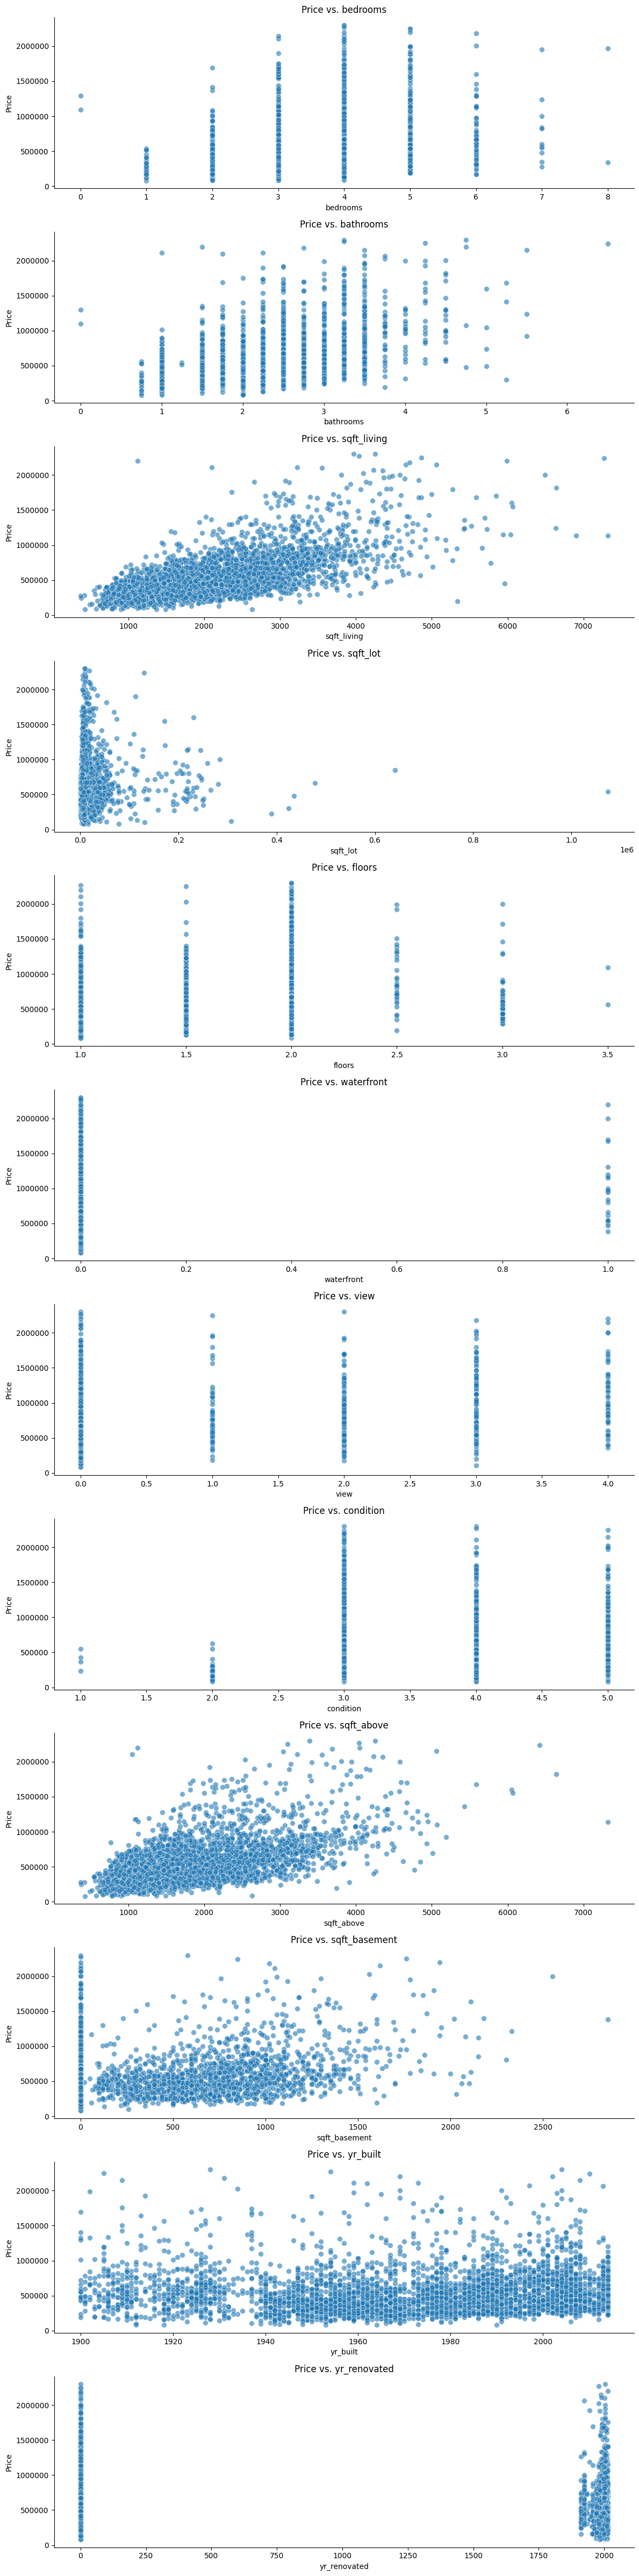

In [ ]:
# @title Pairplots w/ price
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

num_features = df_cleaned_no_outliers.select_dtypes(include=['number']).columns.tolist()
num_features.remove('price')

plt.figure(figsize=(12, len(num_features) * 4))

for i, feature in enumerate(num_features, 1):
    plt.subplot(len(num_features), 1, i)
    sns.scatterplot(x=df_cleaned_no_outliers[feature], y=df_cleaned_no_outliers['price'], alpha=0.6, s=50)

    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.title(f'Price vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')

    plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter())
    plt.gca().ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()



#Notes on Pairplots:
1.) Price vs. Bedrooms: Roughly normal distribution (visually) with a concentration around the range of 3-6 bedrooms.

2.) Price vs. Bathrooms: More linear (upward indicating positive correlation) but relatively wide spread

3.) Price vs. Square Foot Living Space: linear (upward indicating positive correlation), with tighter spread near lower range and wider spread near upper range

4.) Price vs. Square Foot Loft: Tight cluster around bottom of range (many homes have no or very small loft space), several high visual outliers

5.) Price vs. Floors: Mostly evenly distributed from 1.0 - 3.0 with a concentration around 2.0 floors. Slight right skew as number of homes begins to taper off around 3.0 floors, and only two homes with 3.5 floors.

6.) Price vs. Waterfront: Binomial distribution (0 or 1). Higher concentration at 0 (no waterfront) and lower concentration at 1 (waterfront)

7.) Price vs. View: Roughly even distribution across range

8.) Price vs. Condition: Roughly even distribution across scores 3.0, 4.0, and 5.0 with small number of homes at 2.0 and 1.0

9.) Price vs. Square Foot Above: linear (upward indicating positive correlation), with tighter spread near lower range and wider spread near upper range

10.) Price vs. Square Foot Basement: High concentration at 0 (many homes have no basement), remaining data points show very slight positive correlation (upward right trend) with overall loose spread but tighter spread near lower bound and looser near upper

11.) Price vs. Year Built: Roughly even distribution with very slight but consistent positive correlation across range with slight volume dominance towards the upper range (more data points in recent years). Noticeable gap around the 1930's (Great Depression) and increase in concentration from 1940-

12.) Price vs. Year Renovated: tight smaller concentration around 0 (many homes had no recorded or reported renovations) with majority concentrated around late 1900's and early 2000's. (Almost Binary Classification-like appearance due to the scaling)



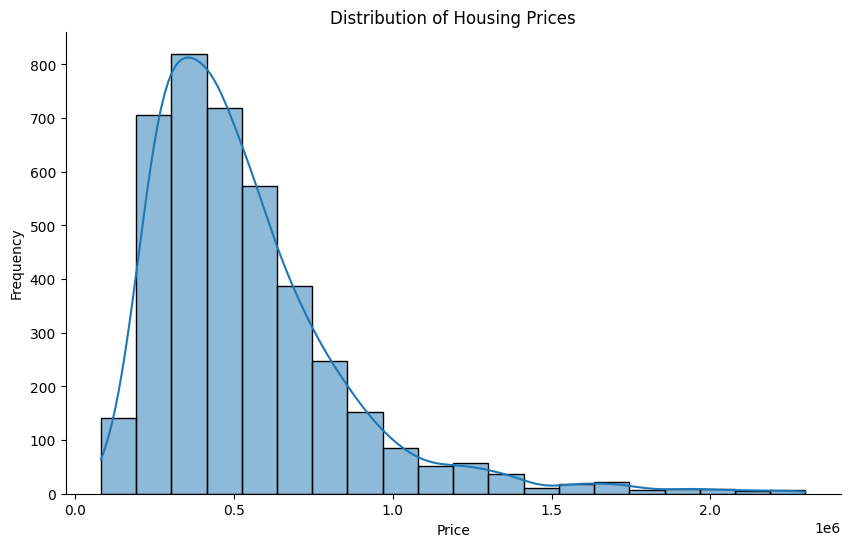

In [ ]:
# @title Distribution of Home Prices (Bar Chart)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_no_outliers['price'], bins=20, kde=True)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


##Distribution of Home Prices Notes:
####-The Home Prices are strongly right skewed with a concentration toward the lower bound of the range (shows a steep drop-off as prices increase)
####-This distribution may violate normality assumptions in linear regression unless transformed.
####-For Market Analysis purposes it may make sense to segment collected housing data (affordable, moderate/average, luxury etc.) in order to normalize and reduce skew towards expensive/luxury outliers

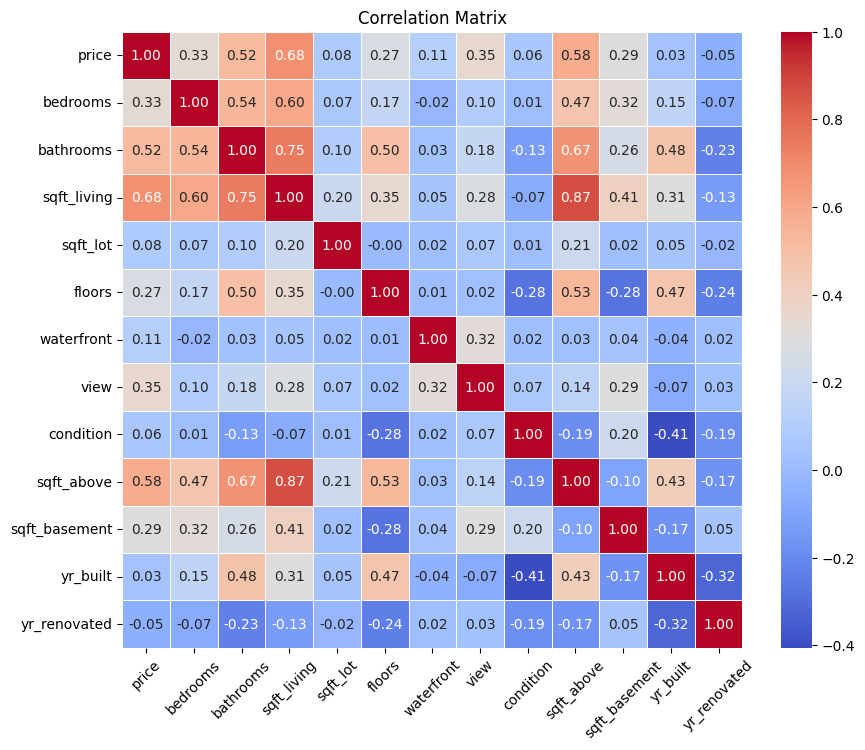

In [ ]:
# @title Correlation Matrix (Heatmap)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Remove non-numeric columns
df_numeric = df_cleaned_no_outliers.select_dtypes(include=['number'])

# Compute correlation matrix for numeric columns only
correlation_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Titles and labels
plt.title("Correlation Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()



###Correlation Matrix Notes
####-The Correlation matrix shows a heat map (hot/dark-red = strong positive correlation, nuetral/grey = no correlation, cold/dark-blue = strong negative correlation)
####- A correlation of 1 would mean for each unit increase of one variable, the other variable increases by a proportional amount (The variables are mostly scaled differently so the slope of the changes is generally not 1:1)
####- Price had the strongest correlation with Square Footage of living space (0.68), square footage above the basement (0.58), and number of bathrooms (0.52)
####-The strongest positive correlation between features was between square footage above the basement and square footage of living space (0.87), likely due to overlap (as all living space would by definition be above the basement). Square footage of living space and number of bathrooms also had a strong positive correlation (0.75).
####-The amount of bathrooms and bedrooms are moderately positively correlated with eachother as well as price
####-The strongest negative correlation is condition and year built (-0.40)which makes intuitive sense as the condition of infrastructure worsens over time
####-Water front and View Rating had a surprisingly nuetral/low correlation with price

#Part III- Expanded Knowledge, additional data sets?

##Beyond this dataset, what other data sources could help inform your investment strategy? Find at least one additional dataset related to real estate and explain:

• Why would this dataset be useful?

• How could it complement the data you are currently analyzing?

• Provide a link to the additional dataset.

__________________________________________________________________

* A time series of housing/rent prices over a specific period or price per square footage would be helpful to indicate growth or appreciation in value of homes in certain areas or with certain features.

* Additional Data Set: (Kaggle) EDA on Zillow's rent index
link: https://www.kaggle.com/datasets/zillow/rent-index

* This data set would increase the scope of the analysis to other cities and states in the US and provide data of changes in prices over time.

* It would also provide a massive amount of additonal data from a credible source (Zillow) to smooth any outliers or bad data

* These two sources of data (or fundamentally similar ones) could then be used to identify potential investment oppurtunities by: (1) Identifying "under-priced" homes based on recorded characteristics and model-based price predictions (2) Cross Reference for homes in areas with strong recent momentum of home value or rent appreciation

#Linear Regression Models: Predicting Home Prices from Characteristics/Features

##Description/Purpose:
-Use machine learning model(s) trained on this data set to predict home prices from the other features/characteristics (80/20 train-test split)

-A stronger r-squared value indicates a better fit of the model over the data set and more accurate predictions

-Sensitivity Analysis will be performed, modeling both with and without the previous removal of outliers and missing data, to see how the model fitting has been affected by these decisions



LinearRegression model results ->
R-squared: 0.7458
Mean Squared Error: 23549782171.248
Mean Absolute Error: 94470.8261


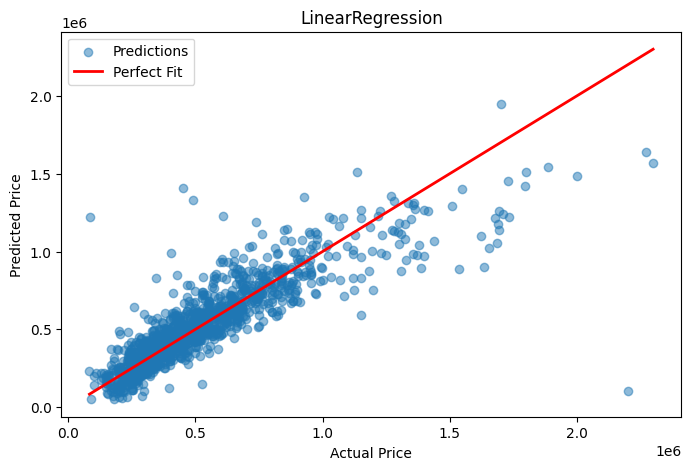

In [ ]:
# @title Simple Linear Regression Model, data cleaned and outliers removed
#df_cleaned_no_outliers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Importing LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare the data
X = df_cleaned_no_outliers.drop(columns=["date", "price", "country", "street", "city"], errors='ignore')  # Drop unnecessary columns

# One-Hot Encoding for zip code only (assuming the 'statezip' column contains zip code information)
X = pd.get_dummies(X, columns=["statezip"], drop_first=True)  # Drop the first column to avoid multicollinearity
y = df_cleaned_no_outliers["price"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define LinearRegression model
model = LinearRegression()  # Use LinearRegression instead of RandomForestRegressor
name = "LinearRegression"

# Train and evaluate the model
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(f"\n\n{name} model results ->")
print(f"R-squared: {round(r2_score(y_test, y_predict), 4)}")
print(f"Mean Squared Error: {round(mean_squared_error(y_test, y_predict), 4)}")
print(f"Mean Absolute Error: {round(mean_absolute_error(y_test, y_predict), 4)}")

# Plot actual vs predicted values with numbers
plt.figure(figsize=(8, 5))
plt.title(f"{name}")

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_predict, alpha=0.5, label="Predictions")

# Add a diagonal line (perfect fit)
x_line = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(x_line, x_line, color='red', linewidth=2, label="Perfect Fit")

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.show()





LinearRegression Model Results->
R-squared: 0.5419
Mean Squared Error: 48028550434.8287
Mean Absolute Error: 121021.2251


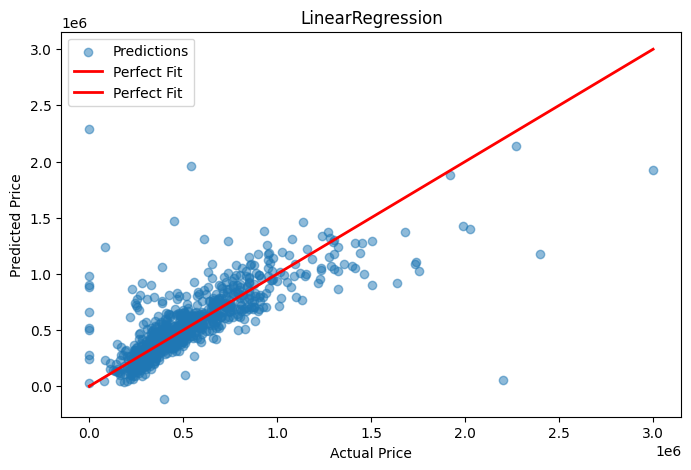

In [ ]:
# @title Linear Regression Model with raw data set
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Importing LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare the data
X = df.drop(columns=["date", "price", "city", "street", "country"], errors='ignore')  # Drop unnecessary columns

# One-Hot Encoding for zip code only (assuming the 'statezip' column contains zip code information)
X = pd.get_dummies(X, columns=["statezip"], drop_first=True)  # Drop the first column to avoid multicollinearity

y = df["price"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Define LinearRegression model
model = LinearRegression()  # Use LinearRegression instead of RandomForestRegressor
name = "LinearRegression"

# Train and evaluate the model
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(f"\n\n{name} Model Results->")
print(f"R-squared: {round(r2_score(y_test, y_predict), 4)}")
print(f"Mean Squared Error: {round(mean_squared_error(y_test, y_predict), 4)}")
print(f"Mean Absolute Error: {round(mean_absolute_error(y_test, y_predict), 4)}")

# Plot actual vs predicted values with numbers
plt.figure(figsize=(8, 5))
plt.title(f"{name}")

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_predict, alpha=0.5, label="Predictions")

# Add a diagonal line (perfect fit)
x_line = np.linspace(y_test.min(), (y_test.max(), 100))
plt.plot(x_line, x_line, color='red', linewidth=2, label="Perfect Fit")

# Annotate a subset of points (to prevent overcrowding)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.show()



In [ ]:
# @title Random Forest Regressor, Data Cleaned and Outliers Removed
#df_cleaned_no_outliers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Importing RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare the data
X = df_cleaned_no_outliers.drop(columns=["date", "price", "city", "street", "country"], errors='ignore')  # Drop unnecessary columns

X = pd.get_dummies(X, columns=["statezip"], drop_first=True)

y = df_cleaned_no_outliers["price"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Define RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators and other parameters
name = "RandomForestRegressor"

# Train and evaluate the model
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(f"\n\n{name} Model Results->")
print(f"R-squared: {round(r2_score(y_test, y_predict), 4)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_predict):,.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_predict)}")

# Plot actual vs predicted values with numbers
plt.figure(figsize=(8, 5))
plt.title(f"{name}")

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_predict, alpha=0.5, label="Predictions")

# Add a diagonal line (perfect fit)
x_line = np.linspace((y_test.min()), (y_test.max(), 100))
plt.plot(x_line, x_line, color='red', linewidth=2, label="Perfect Fit")

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.show()


In [ ]:
# @title Random Forest Regressor, Raw Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Importing RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare the data
X = df.drop(columns=["date", "price", "city", "street", "country"], errors='ignore')  # Drop unnecessary columns

X = pd.get_dummies(X, columns=["statezip"], drop_first=True)

y = df["price"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Define RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators and other parameters
name = "RandomForestRegressor"

# Train and evaluate the model
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(f"\n\nThis is the {name} model ->")
print(f"R-squared: {round(r2_score(y_test, y_predict), 4)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_predict):,.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_predict):,.4f}")

# Plot actual vs predicted values with numbers
plt.figure(figsize=(8, 5))
plt.title(f"{name}")

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_predict, alpha=0.5, label="Predictions")

# Add a diagonal line (perfect fit)
x_line = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(x_line, x_line, color='red', linewidth=2, label="Perfect Fit")

# Annotate a subset of points (to prevent overcrowding)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.show()


## Notes on Regression Models & Sensitivity Analysis (cleaning Missing Data & Outliers)

-The linear regression performed markedly better than the random forest indicating a lean towards simple (linear-type) relationships between characteristics and price

-On the raw data (no outliers or missing data removed) both models performed and fit the data poorly. The r-squared values indicate the models justify less than half the variability in home prices

-The ML models performed significantly better on the cleaned and outlier-removed data, producing ~75% and ~65% r-squared values respectively

-This performance is not bad by any means but leaves room for feature engineering (such as adding, removing, or transforming features) or testing of other model types

-As a next step I would consider removing some of the overlapping square footage features and adding features like: private garage (y/n or size), proximity to public transportation, proximity to downtown/concentrated business area, local school ratings, etc.

-I would also consider seperating the data into tranches based on price
in order to reduce skew/outliers and normalize the data for analysis and modeling

# Part IV- Communicate Findings, Conclusions & Determinations
## Communicating Your Findings:
###Your submission should be structured for an audience that is not familiar with real estate or data analysis. Ensure that your explanations are clear and concise.
_________________________________________________________________________
-The data set was relatively clean and robust but had a few missing data points and numerous significant or unreasonable outliers.

-The scope of the data is limited to ~4,000 homes in Washington State sold during 2014 which is a fairly small, geographically specific, and outdated sample

-The data set is not very credible as it lacks a verifiable source and background information

-There are seventeen independent features (discluding price) which may cause unecessary noise and confuse or cause overfitting of ML models, especially the overlapping square footage features

-Theoretically, regression or other ML models could be used to identify arbitrage oppurtunities where homes may be "undervalued" in the market (priced below the expected value based on its features) and flipped for a profit.

-Further analysis could be done with time series data to identify geographical areas (cities, streets etc.) in which home or rent prices are appreciating rapidly and could provide further Real Estate oppurtunities

-The Machine Learning models I ran, Linear Regression and Random Forest, performed moderately well (loosely fit the data) and ran best with missing values and outliers removed from the data set